### Introduction

In this jupyter notebook, we compare three sorting algorithms:

1. Bubblesort
2. Quicksort, using the last element of each subarray as pivot (i.e. Lomuto scheme)
3. Quicksort, using the middle element of each subarray as pivot (a variant of the Hoare scheme)

These sorting algorithms are implemented in the accompanying file sorting_algorithms.py.

### What data do we generate and plot?

For various sizes $N$ of arrays, we generate $N_{\mathrm{sample}} = 100$ arrays of size $N$ and with random integers ranging from 0 to $2N-1$. For each of these random arrays, we run each of the sorting algorithms. 

We measure and plot both 
* the mean number of comparisons of array elements, $\langle T \rangle$, as well as 
* the mean physical time needed for sorting, $\langle \tau \rangle$.

Mean here refers to averaging over the results of all $N_{\mathrm{sample}} = 100$ samples for each size $N$ and algorithm.

Since the scaling on random arrays is for some algorithms different from the scaling on already sorted arrays, we repeat our analysis for $N_{\mathrm{sample}} = 100$ sorted arrays.

### What do we find?

For random integers arrays, we observe the following scalings with array size $N$:

| Algorithm | Scaling of $\langle T \rangle$ | Scaling of $\langle \tau \rangle$ |
| --- | --- | --- |
| Bubblesort | $N^2$ | $N^2$ |
| Quicksort, using the last element as pivot | $N \log N$ | $N \log N$ |
| Quicksort, using the center element as pivot | $N \log N$ | $N \log N$ |

For sorted integers arrays, we observe the following scalings with array size $N$:

| Algorithm | Scaling of $\langle T \rangle$ | Scaling of $\langle \tau \rangle$ |
| --- | --- | --- |
| Bubblesort | $N \log N$ | $N \log N$ |
| Quicksort, using the last element as pivot | $N^2$ | $N^2$ |
| Quicksort, using the center element as pivot | $N \log N$ | $N \log N$ |

Note that both Bubblesort, and Quicksort with the last element as pivot, have a different scaling depending on whether the input array is already sorted or not.

(All these results are consistent with the literature..)


### Import modules and helper functions

In [1]:
import numpy as np

In [2]:
from sorting_algorithms import *
# imports classes
# - bubblesort
# - quicksort

In [3]:
from helper_functions import * 
# imports functions
# - compare_algorithms
# - plot_results

### Define parameters $N$, $N_{\mathrm{samples}}$, and algorithms

In [4]:
Ns = np.logspace(1,3,num=20,dtype=int)
print(Ns)

[  10   12   16   20   26   33   42   54   69   88  112  143  183  233
  297  379  483  615  784 1000]


In [5]:
N_samples = 1000

In [6]:
algorithms = {'Bubblesort':bubblesort(),
                'Quicksort, lomuto':quicksort(mode='lomuto'),
                'Quicksort, hoare':quicksort(mode='hoare')}

### Compare algorithms for random arrays

In [7]:
T, Times = compare_algorithms(algorithms=algorithms,
                              Ns=Ns,
                              N_samples=N_samples)

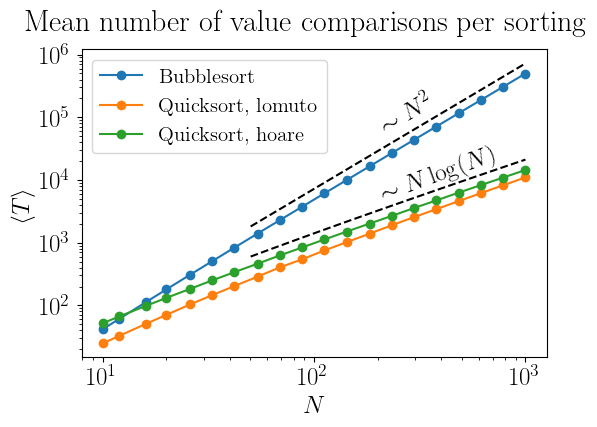

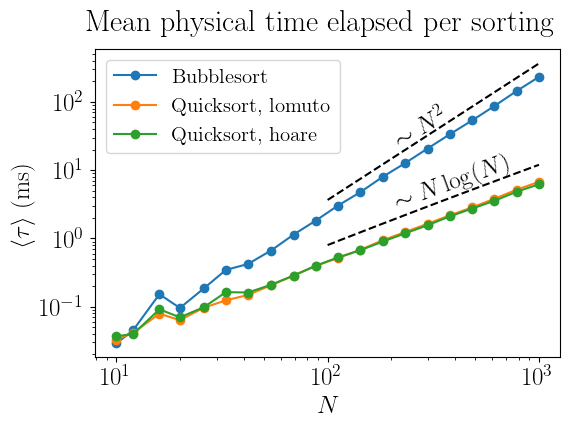

In [8]:
plot_results(algorithms=algorithms,
             T=T,
             Times=Times,
             Ns=Ns,
             filename_prefix='random')

### Compare algorithms for sorted arrays

In [9]:
sorted_input = True

T, Times = compare_algorithms(algorithms=algorithms,
                              Ns=Ns,
                              N_samples=N_samples,
                              sorted_input=sorted_input)

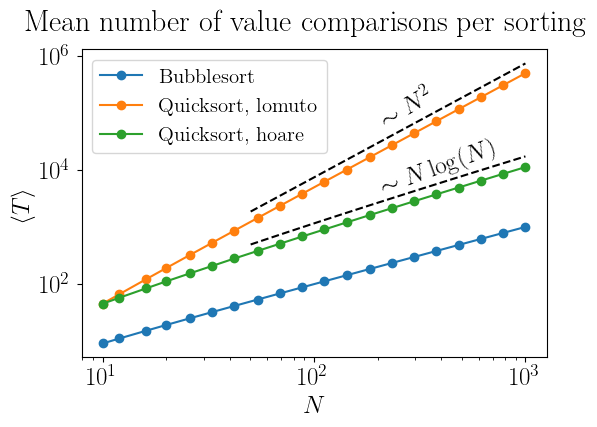

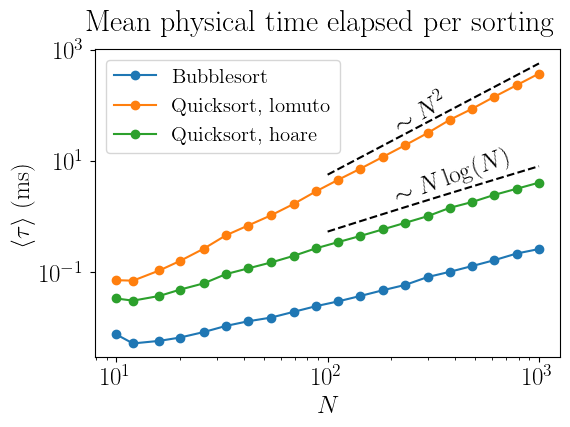

In [10]:
scalebars={1:'2',
           2:'log'}
plot_results(algorithms=algorithms,
             T=T,
             Times=Times,
             scalebars=scalebars,
             Ns=Ns,
             filename_prefix='sorted')